Y_train min: -7.4177537
Y_train max: 3.9213624
Shapes: (3120, 1) (3120, 4) (3120, 14063)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ wind_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ feature_input       │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 5)         │          0 │ wind_input[0][0], │
│ (Concatenate)       │                   │            │ feature_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │        384 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │      4,160 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │      4,160 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pressure_output     │ (None, 1)         │         65 │ dense_5[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,769 (34.25 KB)

 Trainable params: 8,769 (34.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3204
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3091
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2900
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2871
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2942
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2952
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2839
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2865
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2784
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2948
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2963
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2812
Epoch 13/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2939
Epoch 14/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3003
Epoch 15/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2799
Epoch 16/50
98/98 ━

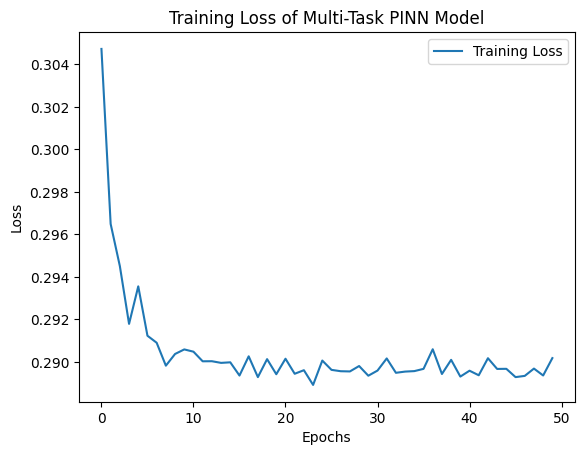

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted Mean Pressure Coefficient at 15°: -0.2627
Predicted Mean Pressure Coefficient at 37°: -0.2623
Predicted Mean Pressure Coefficient at 60°: -0.2619
Predicted Mean Pressure Coefficient at 75°: -0.2616
Predicted Mean Pressure Coefficient at 95°: -0.2612


In [2]:
import numpy as np
import scipy.io as sio
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler

# Enable GPU if available
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Function to load MAT files and extract relevant data
def load_mat_files(directory):
    data = []
    for file in os.listdir(directory):
        if file.endswith(".mat"):
            mat_data = sio.loadmat(os.path.join(directory, file))
            if all(key in mat_data for key in ['Wind_pressure_coefficients', 'Roof_pitch', 'Building_depth', 'Building_breadth', 'Building_height', 'Wind_azimuth']):
                wind_pressure = mat_data['Wind_pressure_coefficients']
                roof_pitch = mat_data['Roof_pitch'].flatten()
                building_depth = mat_data['Building_depth'].flatten()
                building_breadth = mat_data['Building_breadth'].flatten()
                building_height = mat_data['Building_height'].flatten()
                wind_azimuth = mat_data['Wind_azimuth'].flatten()

                num_samples = wind_pressure.shape[1]
                wind_azimuth_repeated = np.tile(wind_azimuth[0], num_samples) if len(wind_azimuth) < num_samples else wind_azimuth

                for i in range(num_samples):
                    data.append((
                        wind_azimuth_repeated[i],
                        np.array([roof_pitch[0], building_depth[0], building_breadth[0], building_height[0]]),
                        wind_pressure[:, i]
                    ))

    if not data:
        print("No valid data found. Check directory structure and .mat file contents.")
    return data

# Specify folder path
data_dir = "C:/Users/rrsuj/Downloads/capstone/data"  # Change this to match your data location
data = load_mat_files(data_dir)

# Debug: Check if data is empty
if not data:
    raise ValueError("No data was loaded. Ensure the folder path is correct and .mat files contain the required keys.")

# Prepare dataset
X_wind, X_features, Y_train = zip(*data)
X_wind = np.array(X_wind).reshape(-1, 1)  # Wind azimuth
X_features = np.array(X_features)  # Combined feature vector
Y_train = np.array(Y_train)  # Pressure coefficient

# Check Y_train distribution
print("Y_train min:", np.min(Y_train))
print("Y_train max:", np.max(Y_train))

# Feature Scaling
scaler_wind = StandardScaler()
scaler_features = StandardScaler()

X_wind = scaler_wind.fit_transform(X_wind)
X_features = scaler_features.fit_transform(X_features)

print("Shapes:", X_wind.shape, X_features.shape, Y_train.shape)

# Define PINN with multi-task learning
def build_pinn():
    wind_input = Input(shape=(1,), name="wind_input")
    feature_input = Input(shape=(4,), name="feature_input")

    x = Concatenate()([wind_input, feature_input])
    x = Dense(64, activation="tanh")(x)
    x = Dense(64, activation="tanh")(x)
    x = Dense(64, activation="tanh")(x)
    output = Dense(1, activation="linear", name="pressure_output")(x)

    model = Model(inputs=[wind_input, feature_input], outputs=output)
    return model

# Physics-informed loss (Modified to avoid unnecessary scaling)
def physics_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Compile model
pinn = build_pinn()
pinn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=physics_loss)
pinn.summary()

# Train model
history = pinn.fit([X_wind, X_features], Y_train, epochs=50, batch_size=32, verbose=1)

# Plot Training Loss
plt.plot(history.history['loss'], label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss of Multi-Task PINN Model")
plt.show()

# Predict for test angles
test_angles = np.array([[15], [37], [60], [75], [95]])
test_angles = scaler_wind.transform(test_angles)  # Scale test inputs

test_features = np.zeros((len(test_angles), 4))  # Dummy feature data
test_features = scaler_features.transform(test_features)  # Scale test features

predicted_Cp = pinn.predict([test_angles, test_features])

# Display Predictions
for i, angle in enumerate([15, 37, 60, 75, 95]):
    print(f"Predicted Mean Pressure Coefficient at {angle}°: {predicted_Cp[i][0]:.4f}")
